In [29]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\sss\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


Data Preprocessing


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('communities.csv')


In [31]:
#print(df)

In [32]:
columns = list(df)
print(columns)
col = columns[5:-1]
for i in col:
  df[i].fillna(df[i].median(), inplace=True)
#print(df)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [33]:
df['HighCrime'] = (df['ViolentCrimesPerPop'] > 0.1)
#A new column for target feature

In [34]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df.HighCrime)


In [35]:

features = list(df)

#This consists of all the features in a data frame

features.remove("ViolentCrimesPerPop")
#As we have a new column ‘High crime’ based on this feature, 
#we remove this column for our model

features.remove("Target")
features.remove("HighCrime")
#Target and high crime features are not included in the remaining features’ list 

feat = features[5:]
#first five attributes are mentioned to be non-predictive in the description of the data set


In [36]:
print(feat)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHo

Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)
print(X_train)
print(X_test)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

               0.00             0.15  
1277                 0.00             0.15  
500                  0.00             0.15  
905                  0.00             0.15  
427                  0.00             0.15  
96                   0.00             0.15  
138                  0.00             0.15  
1984                 0.00             0.15  
1112                 0.00             0.15  
238                  0.00             0.15  
1478                 0.00             0.15  
61                   0.00             0.15  
331                  0.00             0.15  
610                  0.00             0.15  
1840                 0.00             0.15  
739                  0.24             0.08  
527                  0.00             0.15  
1321                 0.00             0.15  
1162                 0.00             0.15  
1223                 0.27             0.10  
396                  0.50             0.07  
456                  0.00             0.15  
1732            

DecisionTreeClassifier(criterion='entropy')

In [38]:
y_pred = dt.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy_dt = accuracy_score(y_test,y_pred)*100
print('Accuracy: ', accuracy_dt)
precision_dt = precision_score(y_test,y_pred)*100 
print(precision_dt)
recall_dt = recall_score(y_test,y_pred)*100
print(recall_dt)
f1= 2*(precision_dt * recall_dt) / (precision_dt+recall_dt)
print(f1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy:  76.15230460921843
81.78913738019169
80.50314465408806
81.14104595879556
[[124  57]
 [ 62 256]]


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
model = DecisionTreeClassifier(criterion = 'entropy')
 
acc_score = []
pre_score = []
rec_score = []
f1_sc =[]
 
for train_index , test_index in kf.split(x):
    X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    pre = precision_score(pred_values , y_test)
    pre_score.append(pre)
    rec = recall_score(pred_values , y_test)
    rec_score.append(rec)
    f1sc= f1_score(pred_values , y_test)
    f1_sc.append(f1sc)
     
avg_acc_score = sum(acc_score)/k
avg_pre_score = sum(pre_score)/k
avg_rec_score = sum(rec_score)/k
avg_f1_score = sum(f1_sc)/k

print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg accuracy : {}'.format(avg_pre_score))
print('Avg accuracy : {}'.format(avg_rec_score))
print('Avg f1 score : {}'.format(avg_f1_score))


Avg accuracy : 0.7722939698492463
Avg accuracy : 0.8140099653505629
Avg accuracy : 0.8232740780234156
Avg f1 score : 0.8177790991803178


The top 10 Feature importances are:

PctKids2Par, Score: 0.285
racePctWhite, Score: 0.143
HousVacant, Score: 0.034
racePctHisp, Score: 0.029
FemalePctDiv, Score: 0.028
PctSameState85, Score: 0.021
PctEmplProfServ, Score: 0.02
PctWorkMomYoungKids, Score: 0.019
PctVacMore6Mos, Score: 0.019
AsianPerCap, Score: 0.018


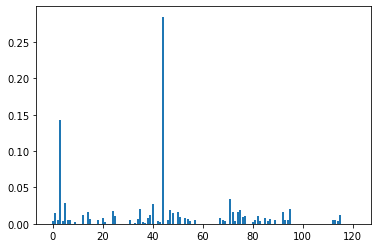

In [41]:
from matplotlib import pyplot
importance = dt.feature_importances_
#for i,v in enumerate(importance):
  #print('Feature: %0d, Score: %.5f' % (i,v))
 
imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')

for f, i in sorted_list[:10]:
    print(f'{X_train.columns[f]}, Score: {round(i, 3)}')



# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [43]:
y_predrf = classifier.predict(X_test)


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_predrf)
print(cm)
acc = accuracy_score(y_test, y_predrf) * 100
print(acc)
precision_dt = precision_score(y_test,y_predrf)*100 
print(precision_dt)
recall_dt = recall_score(y_test,y_predrf)*100
print(recall_dt)

[[152  36]
 [ 47 264]]
83.36673346693387
88.0
84.88745980707395


In [46]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import KFold
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10)
model=RandomForestClassifier(n_estimators=50) 

results = model_selection.cross_validate(estimator=model,
                                          X=x,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
print(results['test_accuracy'].mean())
print(results['test_precision'].mean())
print(results['test_recall'].mean())
print(results['test_f1_score'].mean())

0.8344999999999999
0.8699249179194888
0.8657798971961593
0.8674677993800219


The top 10 Feature importances are:

racePctWhite, Score: 0.068
PctKids2Par, Score: 0.053
PctIlleg, Score: 0.048
PctFam2Par, Score: 0.045
PctYoungKids2Par, Score: 0.035
PctPersDenseHous, Score: 0.032
TotalPctDiv, Score: 0.03
FemalePctDiv, Score: 0.025
racepctblack, Score: 0.025
PctTeen2Par, Score: 0.024


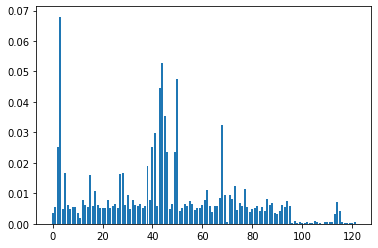

In [47]:
from matplotlib import pyplot

importance = classifier.feature_importances_


imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')

for f, i in sorted_list[:10]:
    print(f'{X_train.columns[f]}, Score: {round(i, 3)}')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#Naive Bayes Classification

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train) 

GaussianNB()

In [60]:
y_prednb = clf_gnb.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prednb)
print(cm)

[[171  14]
 [146 168]]


In [62]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import KFold
scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 'f1_score' : make_scorer(f1_score)}

kfold = model_selection.KFold(n_splits=10)


results = model_selection.cross_validate(estimator=clf_gnb,X=X_test,y=y_test,cv=kfold,scoring=scoring)
print(np.mean(results['test_accuracy']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_f1_score']))

0.6612244897959184
0.9267231525784159
0.5061646763747136
0.6481913674968832


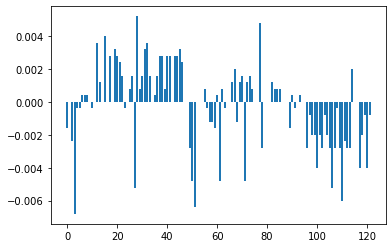

Feature ranking:
1. PctPopUnderPov (0.005210)
2. PctHousNoPhone (0.004810)
3. pctWInvInc (0.004008)
4. PctUnemployed (0.003607)
5. medIncome (0.003607)
6. medFamInc (0.003206)
7. PctBSorMore (0.003206)
8. PctYoungKids2Par (0.003206)
9. perCapInc (0.002806)
10. pctWPubAsst (0.002806)
11. PctOccupMgmtProf (0.002806)
12. MalePctDivorce (0.002806)
13. PctKids2Par (0.002806)
14. PctFam2Par (0.002806)
15. TotalPctDiv (0.002806)
16. FemalePctDiv (0.002806)
17. whitePerCap (0.002405)
18. PctTeen2Par (0.002405)
19. PopDens (0.002004)
20. PctPersOwnOccup (0.002004)
21. MedNumBR (0.001603)
22. HispPerCap (0.001603)
23. PctEmploy (0.001603)
24. blackPerCap (0.001603)
25. PctHousOwnOcc (0.001603)
26. PctOccupManu (0.001603)
27. PctNotHSGrad (0.001603)
28. PersPerRentOccHous (0.001202)
29. pctWWage (0.001202)
30. PctHousLess3BR (0.001202)
31. PctHousOccup (0.001202)
32. RentLowQ (0.001202)
33. MedRent (0.000802)
34. RentMedian (0.000802)
35. PctVacantBoarded (0.000802)
36. RentHighQ (0.000802)
37. P

In [63]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(clf_gnb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat[indices[f]], importances[indices[f]]))

Linear Regression





In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = df ['Target']
x = df[feat]
X_train, X_test, y_train, y_test = train_test_split(x , y)

linreg = LinearRegression()
linreg.fit(X_train,y_train)



LinearRegression()

In [65]:
y_predlr = linreg.predict(X_test)

In [66]:
pd.options.display.max_rows = 999

In [67]:
lst = linreg.coef_
data_tuples = list(zip(feat,lst))
dflin = pd.DataFrame(data_tuples, columns=['ftrs', 'imp'])
dflin.imp =dflin.imp
#print(dflin)
dflin = dflin.sort_values(by='imp', ascending=False)
print(dflin)


                      ftrs       imp
103            PolicPerPop  9.121558
0               population  3.183031
96            LemasSwornFT  1.219682
73           PctHousOwnOcc  1.197244
64        PersPerOccupHous  1.139593
19               medFamInc  1.066020
38          MalePctDivorce  0.967076
98       LemasSwFTFieldOps  0.938257
37        PctOccupMgmtProf  0.923354
40            FemalePctDiv  0.847616
58            PctRecImmig8  0.701604
84               RentHighQ  0.568951
101      LemasTotReqPerPop  0.546097
80            OwnOccMedVal  0.492602
5              racePctHisp  0.471576
7              agePct12t29  0.458402
9               agePct65up  0.417122
20               perCapInc  0.349501
121        PolicBudgPerPop  0.341781
91          PctForeignBorn  0.335030
55           PctImmigRec10  0.297341
46             PctTeen2Par  0.260159
118    LemasPctPolicOnPatr  0.250099
109          PctPolicMinor  0.245741
83              RentMedian  0.231356
39          MalePctNevMarr  0.229398
6

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_predlr)
print(mse)
mse=cross_val_score(linreg,
X_train,y_train,cv=10,scoring='neg_mean_squared_error')

print(abs(mse.mean()))
rsq = linreg.score(X_train, y_train)
print(rsq)


0.11353745385612231
0.1377298349065485
0.4981449842267135


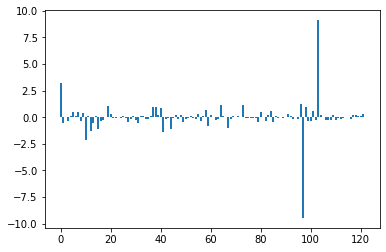

In [70]:
importance = linreg.coef_
indices = np.argsort(importance)[::-1]
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()